# Plant - leaf - diseases

In [1]:
from fastai.vision.all import *
from pathlib import Path
from fastai.vision.widgets import FileUpload, ImageClassifierCleaner

In [2]:
path = Path.cwd()/'../datasets/Plant-leaf'

In [3]:
leaf_ = DataBlock(
        blocks = (ImageBlock, CategoryBlock),
        item_tfms = Resize(256),
        batch_tfms = aug_transforms(),
        get_y = parent_label,
        get_items = get_image_files,
        splitter = RandomSplitter(valid_pct=0.4, seed = 42)
)

In [4]:
dls = leaf_.dataloaders(path)

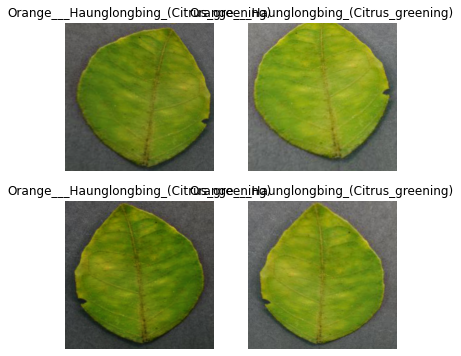

In [5]:
dls.train.show_batch(max_n = 4, nrows = 2, unique=True)

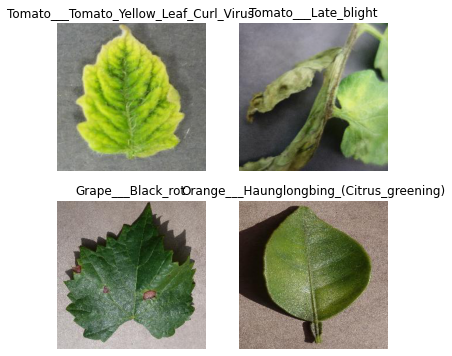

In [6]:
dls.valid.show_batch(max_n = 4, nrows = 2)

In [10]:
model = cnn_learner(dls, resnet18, metrics=[accuracy, error_rate], lr=0.01)
model.fine_tune(10)

In [11]:
interp = ClassificationInterpretation.from_learner(model)

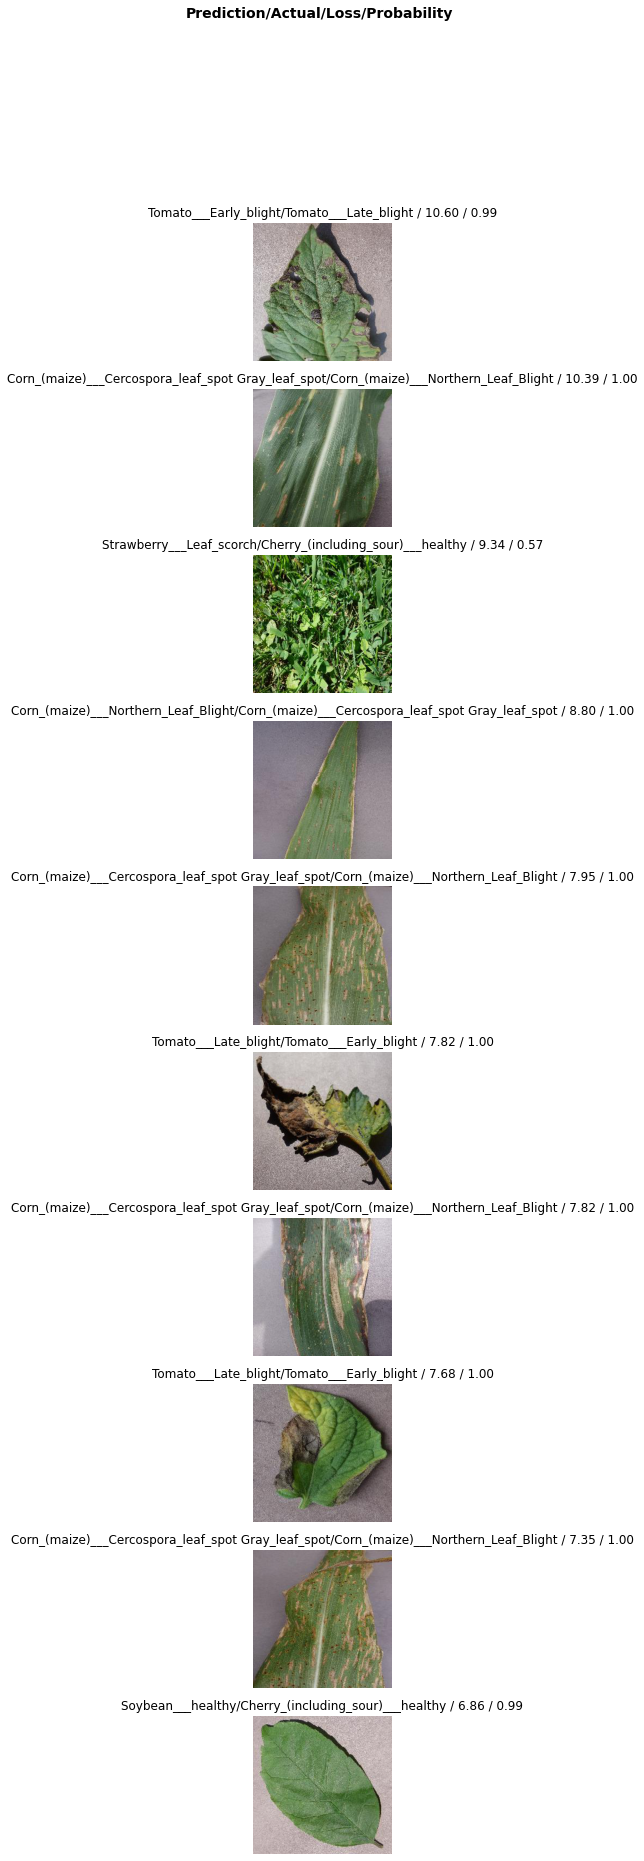

In [12]:
interp.plot_top_losses(10, nrows = 10)

In [22]:
model.export(fname = Path.cwd()/'../models/leaf-diseases-classifier-v2.pkl')

In [5]:
lModel = load_learner(Path.cwd()/'../models/leaf-diseases-classifier-v2.pkl')

In [9]:
btn_upload = FileUpload()
btn_upload


FileUpload(value={}, description='Upload')

In [22]:
name, tens, ful_tens = lModel.predict(btn_upload.data[0])

In [25]:
name, tens

('Strawberry___Leaf_scorch', tensor(26))

In [31]:
import fastai
fastai.__version__

'2.2.4'

In [32]:
from fastai.vision.all import open_image

ImportError: cannot import name 'open_image' from 'fastai.vision.all' (/opt/conda/lib/python3.7/site-packages/fastai/vision/all.py)